In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

## **EDA**

In [15]:
# scatterplot
colors = ['red', 'orange', 'blue']
Species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

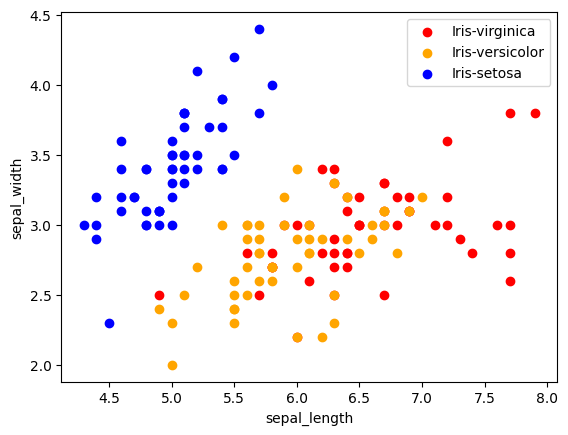

In [17]:

for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=Species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

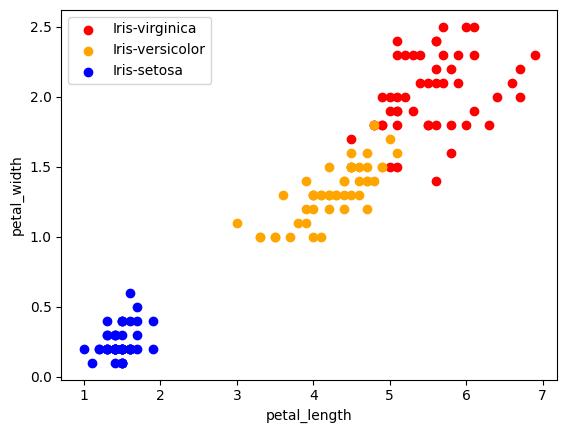

In [19]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=Species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

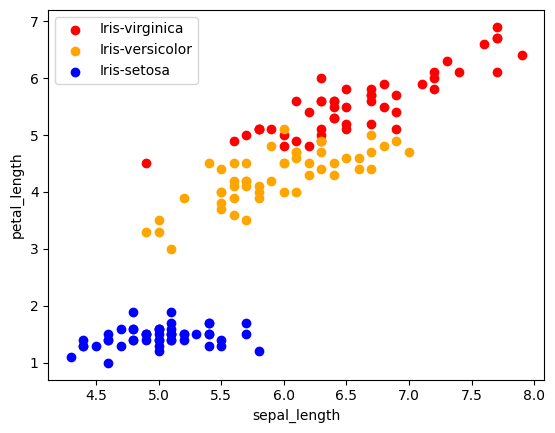

In [21]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=Species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

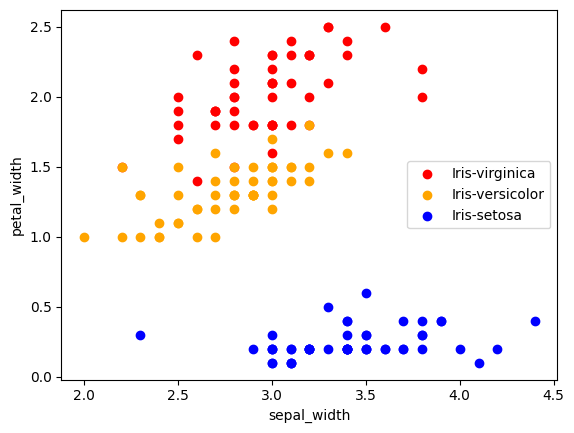

In [22]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=Species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

<ipython-input-23-99c8497b7cd8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

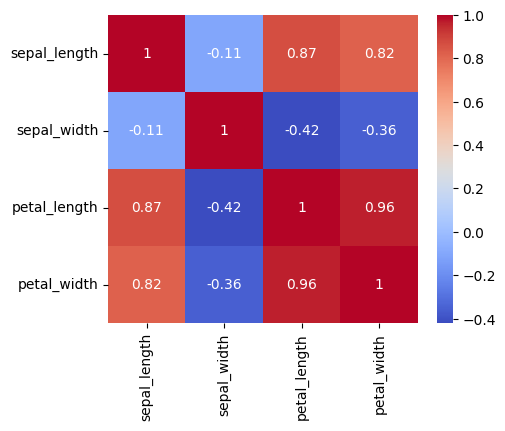

In [23]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])


# model training

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = df['species_encoded']  # Target variable

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Predict the species on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## model testing

In [32]:
new_data_dict = {
    'sepal_length': [5.2],
    'sepal_width': [3.1],
    'petal_length': [1.6],
    'petal_width': [0.1]
}

new_data = pd.DataFrame(new_data_dict)

In [33]:
new_predictions = classifier.predict(new_data)

# Decode the numerical predictions back to species labels (0 for 'setosa', 1 for 'versicolor', 2 for 'virginica')
decoded_predictions = label_encoder.inverse_transform(new_predictions)

# Print the predictions
print("Predicted species for new data:")
print(decoded_predictions)

Predicted species for new data:
['Iris-setosa']
